###### Introduction: Web Scraping with Selenium
###### Web scraping is the process of extracting data from websites programmatically. 
###### In this project, we will use **Selenium**  to scrape data from the **Amazon Bestsellers in Books** webpage. The primary goal is to extract meaningful information such as:
###### - Book titles
###### - Authors
###### - Ratings
###### - Number of customer reviews
###### - Prices
###### This extracted data is further processed and analyzed to gain insights into popular books, pricing patterns, and customer preferences.


In [2]:
#import necessary libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import pandas as pd
import time

In [3]:
driver = webdriver.Chrome()

# URLs for the two pages
urls = [
    "https://www.amazon.in/gp/bestsellers/books",
    "https://www.amazon.in/gp/bestsellers/books/ref=zg_bs_pg_2?_encoding=UTF8&pg=2"
]

# List to store data
data = []

# Function to scrape a single page
def scrape_page():
    books = driver.find_elements(By.CSS_SELECTOR, "div.p13n-sc-uncoverable-faceout")
    for book in books:
        try:
            # Extract title
            title = book.find_element(By.CSS_SELECTOR, "div._cDEzb_p13n-sc-css-line-clamp-1_1Fn1y").text

            # Extract author
            author = book.find_element(By.CSS_SELECTOR, "div.a-row.a-size-small").text

            try:
                rating_element = book.find_element(By.CSS_SELECTOR, '.a-icon-alt')
                rating = rating_element.get_attribute('innerHTML')
                rating = rating.split()[0]
            except Exception as e:
                print(f"Rating not found for {books}: {e}")


            
            # Extract customers rated
            try:
                customers_rated = book.find_element(By.XPATH, ".//div[@class='a-icon-row']/a/span[contains(@class, 'a-size-small')]").text.replace(",", "")
            except:
                customers_rated = None 

            # Extract price
            try:
                price = book.find_element(By.CSS_SELECTOR, "span._cDEzb_p13n-sc-price_3mJ9Z").text.replace("₹", "").replace(",", "")
                price = float(price) if price else None
            except:
                price = None  # If price is not available

            # Append to data
            data.append({
                "Title": title,
                "Author": author,
                "Rating": rating,
                "Customers Rated": customers_rated,
                "Price": price
            })
        except Exception as e:
            print(f"Error scraping a book: {e}")

# Measure processing time
start_time = time.time()
# Loop through the two pages
for i, url in enumerate(urls, start=1):
    print(f"Scraping page {i}...")
    driver.get(url)
    scrape_page()

# Close the driver
driver.quit()

# Calculate and print processing time
end_time = time.time()
processing_time = end_time - start_time

# Convert data to a DataFrame
best_seller = pd.DataFrame(data)

# Save to a CSV file
output_file = "selenium_amazon_bestseller_books.csv"
best_seller.to_csv(output_file, index=False)

# Print processing time and file save message
print(f"File saved as {output_file}")
print(f"\nTime taken to process: {processing_time:.2f} seconds")

Scraping page 1...


C:\Users\cmanc\AppData\Local\Temp\ipykernel_22608\1874912095.py:25: DeprecationWarning: using WebElement.get_attribute() has been deprecated. Please use get_dom_attribute() instead.
  rating = rating_element.get_attribute('innerHTML')


Rating not found for [<selenium.webdriver.remote.webelement.WebElement (session="983724446e30f5a5c2fbe337abd978b2", element="f.2B8277B277F601046B4F4BEF182699B8.d.971790FCD56C36A3D1CDAA9F93730230.e.24")>, <selenium.webdriver.remote.webelement.WebElement (session="983724446e30f5a5c2fbe337abd978b2", element="f.2B8277B277F601046B4F4BEF182699B8.d.971790FCD56C36A3D1CDAA9F93730230.e.25")>, <selenium.webdriver.remote.webelement.WebElement (session="983724446e30f5a5c2fbe337abd978b2", element="f.2B8277B277F601046B4F4BEF182699B8.d.971790FCD56C36A3D1CDAA9F93730230.e.26")>, <selenium.webdriver.remote.webelement.WebElement (session="983724446e30f5a5c2fbe337abd978b2", element="f.2B8277B277F601046B4F4BEF182699B8.d.971790FCD56C36A3D1CDAA9F93730230.e.27")>, <selenium.webdriver.remote.webelement.WebElement (session="983724446e30f5a5c2fbe337abd978b2", element="f.2B8277B277F601046B4F4BEF182699B8.d.971790FCD56C36A3D1CDAA9F93730230.e.28")>, <selenium.webdriver.remote.webelement.WebElement (session="983724446

In [4]:
#Display Data
best_seller.head(11)

,Title,Author,Rating,Customers Rated,Price
0,Amma Diarylo Konni Pageelu,Ravi Mantri,4.8,1156,220.0
1,The Psychology of Money,Morgan Housel,4.6,67786,318.0
2,My First Library: Boxset of 10 Board Books for...,Wonder House Books,4.5,80805,399.0
3,PW CBSE | Class 10 | 15 New Pattern Sample Pap...,PW (Physics Wallah),4.7,130,872.0
4,Oswaal CBSE Sample Question Papers Class 10 En...,Oswaal Editorial Board,4.6,270,1362.0
5,The Satvic Revolution: 7 Life-Changing Habits ...,Subah Saraf,4.8,995,323.0
6,Atomic Habits,James Clear,4.6,98915,460.0
7,Oswaal CBSE Sample Question Papers Class 10 Sc...,Oswaal Editorial Board,4.5,44,350.0
8,White Nights,Fyodor Dostoyevsky,4.4,1362,125.0
9,Educart CBSE Sample Paper Class 10 2024-25 - S...,Educart,4.8,119,1534.0


#### EDA - Exploratory Data Analysis

In [5]:
# Display the shape (rows and columns)
print(f"Shape: {best_seller.shape}")

# Display column information
print("\nColumn Info:")
best_seller.info()


Shape: (59, 5)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            59 non-null     object 
 1   Author           59 non-null     object 
 2   Rating           59 non-null     object 
 3   Customers Rated  57 non-null     object 
 4   Price            59 non-null     float64
dtypes: float64(1), object(4)
memory usage: 2.4+ KB


In [6]:
# Convert columns 'Rating', 'Customers Rated', 'Price' to numeric type using pd.to_numeric.
best_seller = best_seller.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.name in ['Rating', 'Customers Rated', 'Price'] else col)

In [7]:
# Display Data information
best_seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            59 non-null     object 
 1   Author           59 non-null     object 
 2   Rating           59 non-null     float64
 3   Customers Rated  57 non-null     float64
 4   Price            59 non-null     float64
dtypes: float64(3), object(2)
memory usage: 2.4+ KB


In [8]:
# check for null values
print(best_seller.isnull().sum())

Title              0
Author             0
Rating             0
Customers Rated    2
Price              0
dtype: int64


In [9]:
best_seller['Customers Rated'] = best_seller['Customers Rated'].fillna(0).astype(int) 

In [18]:
best_seller.head()

,Title,Author,Rating,Customers Rated,Price
0,Amma Diarylo Konni Pageelu,Ravi Mantri,4.8,1156,220.0
1,The Psychology of Money,Morgan Housel,4.6,67786,318.0
2,My First Library: Boxset of 10 Board Books for...,Wonder House Books,4.5,80805,399.0
3,PW CBSE | Class 10 | 15 New Pattern Sample Pap...,PW (Physics Wallah),4.7,130,872.0
4,Oswaal CBSE Sample Question Papers Class 10 En...,Oswaal Editorial Board,4.6,270,1362.0


In [19]:
best_seller.tail()

,Title,Author,Rating,Customers Rated,Price
54,Jasmine Shah,Jasmine Shah,4.7,0,584.0
55,BlackBook of English Vocabulary May 2024 by Ni...,Nikhil Gupta,4.5,826,314.0
56,Word Power Made Easy By Norman Lewis (More tha...,Norman Lewis,4.4,3389,153.0
57,PW All in one RRB NTPC 2024-2025 CBT - 1 Exam ...,PW,3.9,107,295.0
58,My First Complete Learning Library: Boxset of ...,Wonder House Books,4.6,15633,799.0


In [20]:
# Display the shape (rows and columns)
print(f"Shape: {best_seller.shape}")

# Display column information
print("\nColumn Info:")
best_seller.info()

Shape: (59, 5)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            59 non-null     object 
 1   Author           59 non-null     object 
 2   Rating           59 non-null     float64
 3   Customers Rated  59 non-null     int32  
 4   Price            59 non-null     float64
dtypes: float64(2), int32(1), object(2)
memory usage: 2.2+ KB


### Q1: Authors with Highest Priced Book (i.e., based on price)

##### Bar Graph

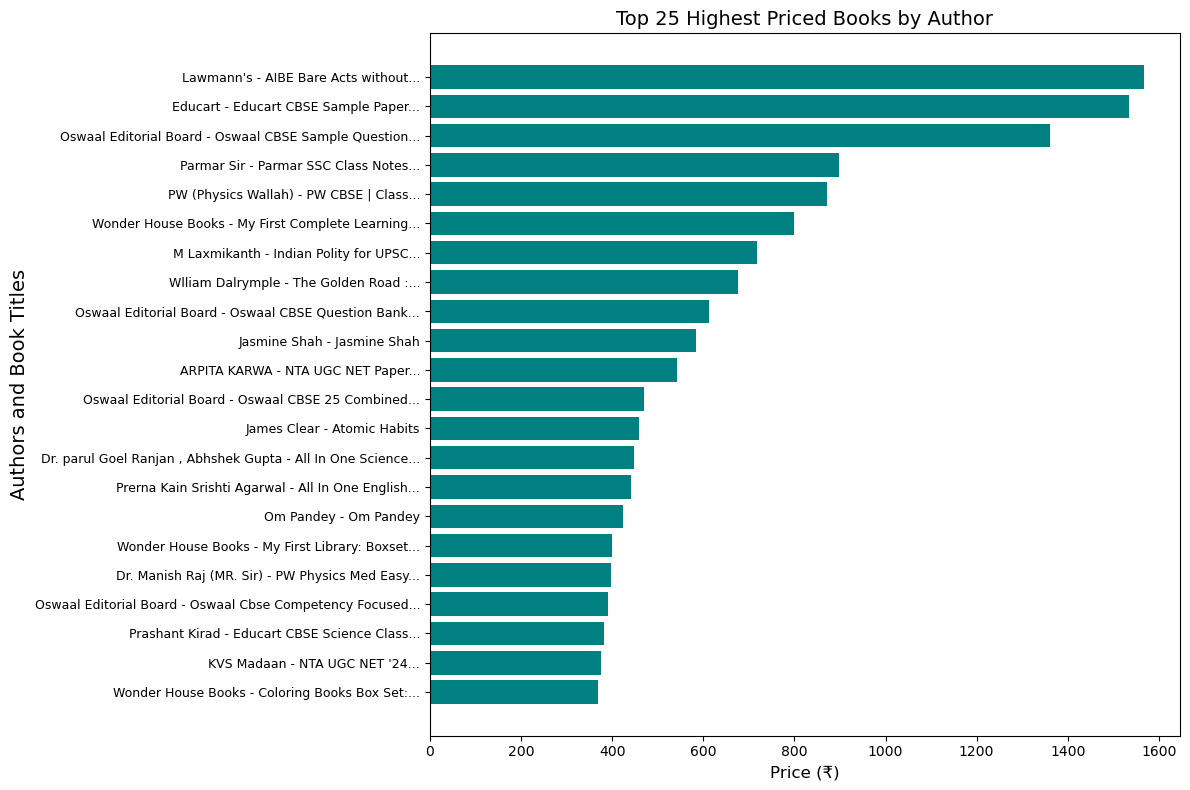

In [12]:
import matplotlib.pyplot as plt

# Get the top 25 highest-priced books and their authors
top_25_highest_priced = best_seller.sort_values(by="Price", ascending=False).head(25)

# Limit book titles to the first 3 words
top_25_highest_priced['Short_Title'] = top_25_highest_priced['Title'].apply(lambda x: ' '.join(x.split()[:4]) + '...' if len(x.split()) > 4 else x)

# Combine author and truncated book title for y-axis labels
top_25_highest_priced['Author_Title'] = top_25_highest_priced['Author'] + ' - ' + top_25_highest_priced['Short_Title']

# Plot a bar diagram
plt.figure(figsize=(12, 8)) 
plt.barh(top_25_highest_priced['Author_Title'], top_25_highest_priced['Price'], color='teal')
plt.xlabel('Price (₹)', fontsize=12)
plt.ylabel('Authors and Book Titles', fontsize=14)
plt.title('Top 25 Highest Priced Books by Author', fontsize=14)
plt.gca().invert_yaxis() 
plt.xticks(fontsize=10)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()


##### Data Frame

In [13]:
top_25_highest_priced.head()

,Title,Author,Rating,Customers Rated,Price,Short_Title,Author_Title
48,AIBE Bare Acts without Notes | 25 Books Set Co...,Lawmann's,4.3,108,1568.0,AIBE Bare Acts without...,Lawmann's - AIBE Bare Acts without...
9,Educart CBSE Sample Paper Class 10 2024-25 - S...,Educart,4.8,119,1534.0,Educart CBSE Sample Paper...,Educart - Educart CBSE Sample Paper...
4,Oswaal CBSE Sample Question Papers Class 10 En...,Oswaal Editorial Board,4.6,270,1362.0,Oswaal CBSE Sample Question...,Oswaal Editorial Board - Oswaal CBSE Sample Qu...
33,"Parmar SSC Class Notes for Polity, Static GK, ...",Parmar Sir,4.3,211,899.0,Parmar SSC Class Notes...,Parmar Sir - Parmar SSC Class Notes...
3,PW CBSE | Class 10 | 15 New Pattern Sample Pap...,PW (Physics Wallah),4.7,130,872.0,PW CBSE | Class...,PW (Physics Wallah) - PW CBSE | Class...


###  Top Rated Books and Authors with respect to the highest customers rating

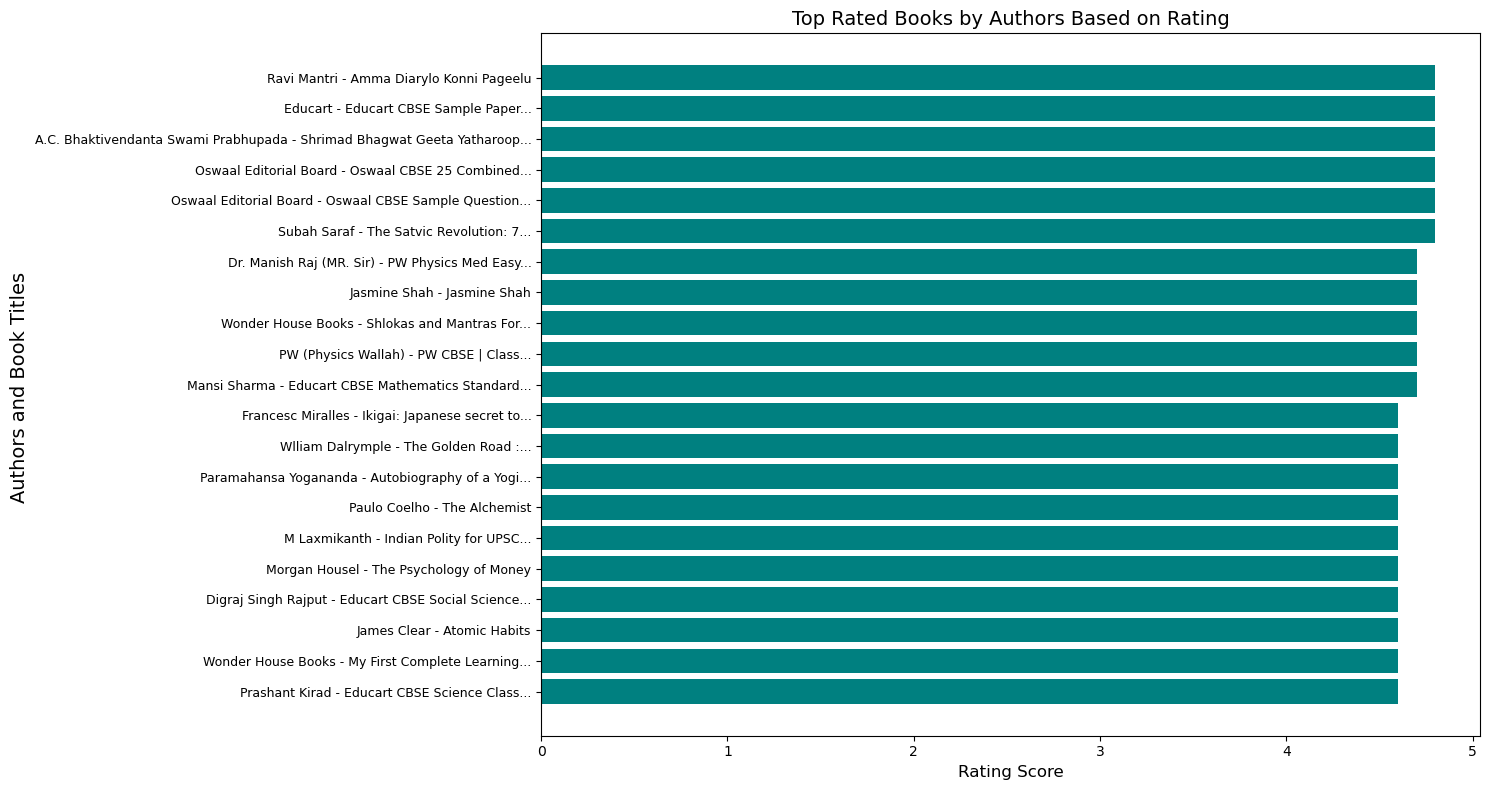

In [14]:
# Sort by Rating in descending order
top_rated_books = best_seller.sort_values(by='Rating', ascending=False).head(25)

# Combine author and truncated book title for y-axis labels 
top_rated_books['Short_Title'] = top_rated_books['Title'].apply(
    lambda x: ' '.join(x.split()[:4]) + '...' if len(x.split()) > 4 else x
)
top_rated_books['Author_Title'] = top_rated_books['Author'] + ' - ' + top_rated_books['Short_Title']

# Plot a bar chart
plt.figure(figsize=(15, 8))
plt.barh(top_rated_books['Author_Title'], top_rated_books['Rating'], color='teal')
plt.xlabel('Rating Score', fontsize=12)
plt.ylabel('Authors and Book Titles ', fontsize=14)
plt.title('Top Rated Books by Authors Based on Rating', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest-rated book at the top
plt.xticks(fontsize=10)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

##### Data Frame

In [15]:
top_rated_books.head()

,Title,Author,Rating,Customers Rated,Price,Short_Title,Author_Title
0,Amma Diarylo Konni Pageelu,Ravi Mantri,4.8,1156,220.0,Amma Diarylo Konni Pageelu,Ravi Mantri - Amma Diarylo Konni Pageelu
9,Educart CBSE Sample Paper Class 10 2024-25 - S...,Educart,4.8,119,1534.0,Educart CBSE Sample Paper...,Educart - Educart CBSE Sample Paper...
51,Shrimad Bhagwat Geeta Yatharoop (Hindi),A.C. Bhaktivendanta Swami Prabhupada,4.8,20375,222.3,Shrimad Bhagwat Geeta Yatharoop...,A.C. Bhaktivendanta Swami Prabhupada - Shrimad...
45,Oswaal CBSE 25 Combined Sample Question papers...,Oswaal Editorial Board,4.8,101,437.0,Oswaal CBSE 25 Combined...,Oswaal Editorial Board - Oswaal CBSE 25 Combin...
16,Oswaal CBSE 25 Combined Sample Question Papers...,Oswaal Editorial Board,4.8,60,469.0,Oswaal CBSE 25 Combined...,Oswaal Editorial Board - Oswaal CBSE 25 Combin...


### Q3: Topmost Customer Rated Authors and Books based on number of customers)l)

In [16]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.io import push_notebook
from bokeh.palettes import d3
from bokeh.models import ColumnDataSource


# Ensure 'Customers Rated' is numeric
best_seller['Customers Rated'] = pd.to_numeric(best_seller['Customers Rated'], errors='coerce')

# Sort by 'Customers Rated' in descending order and pick top 15
top_customers_rated = best_seller.sort_values(by='Customers Rated', ascending=False).head(15)


# Combine author and truncated book title for visualization labels
top_customers_rated['Short_Title'] = top_customers_rated['Title'].apply(
    lambda x: ' '.join(x.split()[:4]) + '...' if len(x.split()) > 4 else x
)
top_customers_rated['Author_Title'] = top_customers_rated['Author'] + ' - ' + top_customers_rated['Short_Title']

# Use a Bokeh palette for colors
colors = d3['Category20'][15]  # Use a palette with 15 distinct colors

# Create a ColumnDataSource for Bokeh
source = ColumnDataSource(data=dict(
    titles=top_customers_rated['Author_Title'],
    customers=top_customers_rated['Customers Rated'],
    color=colors[:len(top_customers_rated)]
))

# Create a horizontal bar plot
p = figure(
    y_range=top_customers_rated['Author_Title'],
    x_axis_label='Number of Customers Rated',
    title='Top Customer Rated Books by Authors',
    height=500,
    width=1100,
    tools="pan,box_zoom,reset,save"
)

p.hbar(
    y='titles',
    right='customers',
    height=0.6,
    color='color',
    source=source,
    legend_field='titles'
)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.yaxis.axis_label_text_font_size = "10pt"
p.xaxis.axis_label_text_font_size = "10pt"
p.title.text_font_size = "14pt"
p.legend.visible = False  # Hide the legend if the y-axis already has full labels

# Display the plot in a notebook
output_notebook()
show(p, notebook_handle=True)


Loading BokehJS ...

In [17]:
top_customers_rated.head()

,Title,Author,Rating,Customers Rated,Price,Short_Title,Author_Title
37,The Alchemist,Paulo Coelho,4.6,113863,259.0,The Alchemist,Paulo Coelho - The Alchemist
6,Atomic Habits,James Clear,4.6,98915,460.0,Atomic Habits,James Clear - Atomic Habits
2,My First Library: Boxset of 10 Board Books for...,Wonder House Books,4.5,80805,399.0,My First Library: Boxset...,Wonder House Books - My First Library: Boxset...
1,The Psychology of Money,Morgan Housel,4.6,67786,318.0,The Psychology of Money,Morgan Housel - The Psychology of Money
21,Ikigai: Japanese secret to long and happy life,Francesc Miralles,4.6,56549,322.0,Ikigai: Japanese secret to...,Francesc Miralles - Ikigai: Japanese secret to...
